<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER4%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 분류(classification)의 개요**

앙상블을 주로 다루는 챕터입니다. 앙상블은 정형 데이터의 예측 분석 영역에서 매우 좋은 예측 성능을 발휘합니다. 대부분 동일한 알고리즘을 결합하며, 기본 알고리즘으로 사용하는 것은 결정 트리입니다.

# **2. 결정 트리**

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듭니다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다. 쉽게 예측할 수 있는 조건을 찾아서 분류하는 것이 가장 효율적이기 때문입니다.

이러한 정보 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 **정보 이득(Information Gain)**과 지니계수입니다.

정보 이득은 **엔트로피(주어진 데이터 집합의 혼잡도)**를 기반으로 합니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 

지니 계수는 경제학에서 불평등 지수를 나타내는 데 쓰이는 지수입니다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석하고, 지니 계수가 낮은 속성을 기준으로 분할합니다. 다시 말하면, 데이터 세트를 분할하는 데 가장 좋은 조건은 정보 이득이 높거나 지니 계수가 낮은 조건입니다. `DecisionTreeClassifier` 클래스는 기본적으로 지니 계수를 이용하여 데이터를 분할합니다. 

## **2.1. 결정 트리 모델의 특징**

결정 트리는 정보 균일도가 기반이므로 쉽고 직관적입니다. 대부분의 경우 피처 스케일링과 정규화 같은 전처리 작업도 불필요합니다. 다만 과적합되기 쉬우므로 트리 크기를 제한하면서 성능을 튜닝하는 편이 좋습니다.

## **2.2. 결정 트리 파라미터**

- `min_samples_split`: 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정합니다. 과적합 제어에 사용하며, 디폴트는 `2`이고, 작게 지정할수록 분할되는 노드가 많아져서 과적합되기 쉽습니다. 

- `min_samples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 데이터 수를 지정합니다. 과적합 제어에 사용하며, 비대칭적인 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 숫자를 작게 지정할 필요가 있습니다. 

- `max_features`: 최적 분할을 위해 고려할 최대 피처 개수를 지정합니다. 디폴트는 `None`이며 모든 피처를 사용하여 분할합니다. `int`는 대상 피처의 개수, `float`는 전체 피처 중 대상 피처의 퍼센트, `sqrt`는 $\sqrt{전체 피처 개수}$, `auto`는 `sqrt`와 동일하고, `log`는 전체 피처 중 $log2(전체 피처 개수)$입니다.

- `max_depth`: 트리의 최대 깊이를 지정합니다. 디폴트는 `None`이며 클래스 결정값이 될 때까지 깊이를 키워서 분할하거나 노드가 가지는 데이터 수가 `min_samples_leaf`보다 작아질 때까지 깊이를 키웁니다.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정합니다.

## **2.3. 결정 트리 모델의 시각화**

붓꽃 데이터 세트를 시각화해보겠습니다. 먼저 학습을 수행합니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

`export_graphviz()` 메서드를 호출하여 그래프로 시각화할 출력 파일을 생성하겠습니다.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

`graphviz` 패키지를 사용하여 결정 트리를 시각화하겠습니다.

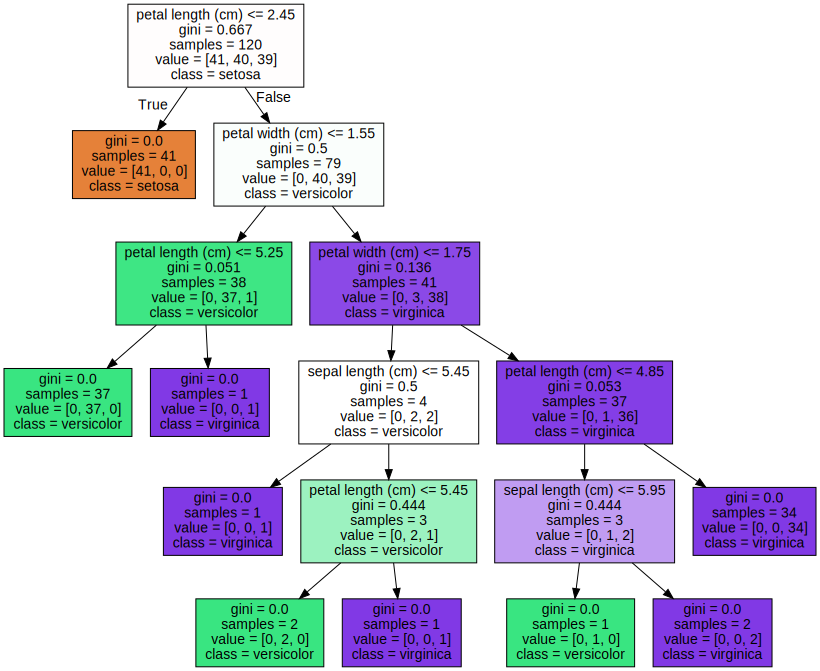

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

피처 중요도를 출력해보겠습니다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


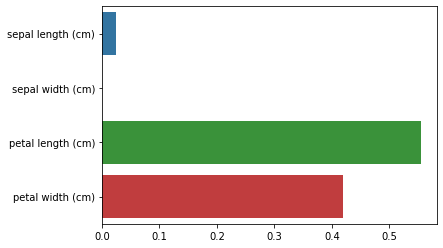

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

## **2.4. 결정 트리 과적합(overfitting)**

`make_classification()` 함수를 사용하여 피처 2개가 클래스 값을 3개만큼 가진 임의의 데이터 세트를 만들고 그래프로 시각화하겠습니다.

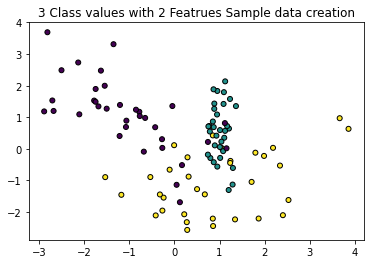

In [ ]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Featrues Sample data creation')
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

본서의 부록에서 가져온 시각화 함수를 사용하여 결정 기준 경계를 시각화해보겠습니다. 먼저 분류기의 하이퍼 파라미터를 기본값으로 학습시키고 구현하겠습니다.

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수입니다.
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터를 scatter plot으로 나타냅니다.
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 학습 데이터로 모델을 학습합니다.
    model.fit(X, y)
    # `meshgrid` 형태인 모든 좌표값으로 예측을 수행합니다. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # `contourf()` 메서드를 이용하여 class boundary를 시각화합니다.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

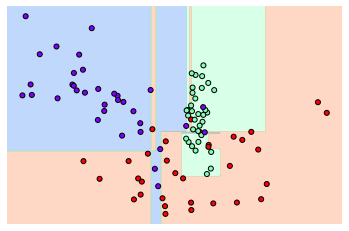

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치(Outlier)까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 많습니다. 하이퍼 파라미터를 기본값으로 학습한 모델은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 기준을 가지고 있습니다. 과대적합을 의미합니다. 

하이퍼 파라미터를 조금 조정하여 시각화해보겠습니다.

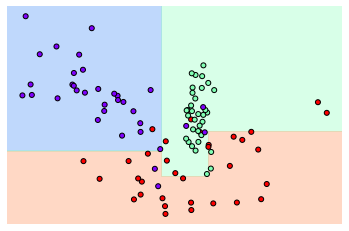

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 민감하지 않은 모델입니다. 이 모델이 과대적합된 위 모델보다 더 나은 예측 성능을 낼 것입니다. 

## **2.5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트**

[UCI 머신러닝 리포지토리의 사용자 행동 인식 데이터 세트](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)에 대한 예측 분류를 수행하겠습니다. 이 데이터는 피실험자 30명에게 스마트폰 센서를 장착시키고 동작과 관련된 여러 피처를 수집한 것입니다.

먼저 피처 종류를 확인해보겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/gdrive/


In [ ]:
feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체 움직임과 관련된 속성의 평균/표준편차가 X축, Y축, Z축 값으로 되어있습니다. 중복된 피처가 있는지 확인해보겠습니다.

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


피처 42개가 중복되어 있습니다. 이 중복된 피처에 _1이나 _2를 붙여서 새 피처를 갖도록 만드는 함수를 선언하겠습니다.

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

데이터셋의 데이터프레임을 생성하는 함수를 선언하겠습니다.

In [ ]:
def get_human_dataset():
    feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    # 중복된 피처를 수정하는 `get_new_feature_name_df()` 함수를 호출하여
    # 새 피처를 가진 데이터프레임을 생성합니다.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # 데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 변환합니다.
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
                          sep='\s+', names=feature_name)
    y_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
                          sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
                          sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

로드한 학습용 피처 데이터 세트를 확인해보겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = get_human_dataset()
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트는 레코드 7352개와 피처 561개로 구성되어 있습니다. 전체 피처가 float형이므로 카테고리 인코딩을 따로 수행하지 않아도 됩니다.

학습 데이터 세트의 칼럼을 확인해보겠습니다.

In [ ]:
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


칼럼 대부분은 움직임 위치와 관련된 속성입니다.

레이블 값과 분포도를 확인해보겠습니다.

In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


먼저 디폴트 설정으로 결정 트리 모델을 생성해보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도: {:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


트리 깊이를 조정하여 정확도가 어떻게 변하는지 살펴보겠습니다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


16일 때 최고 정확도를 도출합니다. 예측 성능이 어떻게 변했는지 확인해보겠습니다. 'mean_test_score'는 CV 세트 5개에서 검증용 데이터 세트의 정확도 평균 수치입니다. 

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해보겠습니다.

In [ ]:
max_depths = [6, 8, 10, 12, 16, 20]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {}, 정확도: {:.4f}'.format(depth, accuracy))

max_depth = 6, 정확도: 0.8558
max_depth = 8, 정확도: 0.8707
max_depth = 10, 정확도: 0.8673
max_depth = 12, 정확도: 0.8646
max_depth = 16, 정확도: 0.8575
max_depth = 20, 정확도: 0.8548


8일 때 정확도가 가장 높습니다. 10부터는 테스트 데이터 세트의 정확도가 감소하고 과적합 될 가능성이 커집니다.

두 파라미터를 바꾸면서 성능을 튜닝해 보겠습니다.

In [ ]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


최적 하이퍼 파라미터 모델로 테스트 데이터 세트에 대한 예측을 수행하겠습니다.

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


피처 중요도를 20개까지만 막대그래프로 시각화해보겠습니다.

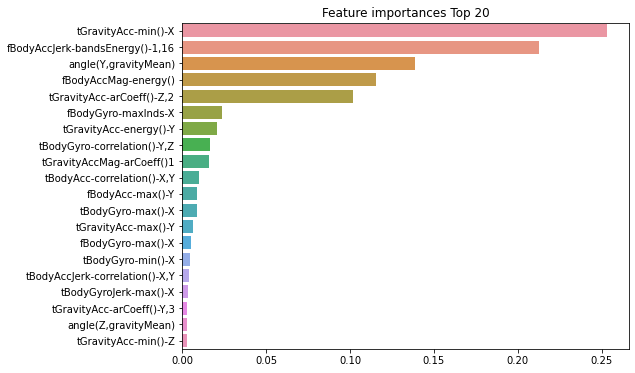

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# 정렬을 쉽게 하고 시본의 막대그래프로 쉽게 표현하기 위해 시리즈로 변환합니다.
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# **3. 앙상블 학습**

## **3.1. 앙상블 학습 개요**

**앙상블 학습(Ensemble Learning)**을 통한 분류는 여러 개의 분류기를 생성하고 그 예측 결과들을 결합하여 더 정확한 최종 예측을 도출하는 기법입니다. 정형 데이터 분류에 앙상블이 매우 뛰어난 성능을 보입니다. 대표적인 앙상블 알고리즘은 랜덤 포레스트와 그레이디언트 부스팅입니다. 특히 **XGBoost**와 **LightGBM**, **스태킹(Stacking)**은 대중적으로 널리 쓰입니다.

앙상블 학습의 방법은 **보팅(Voting)**, **배깅(Bagging)**, **부스팅(Boosting)**, 스태킹(Stacking)입니다.

보팅과 배깅은 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방법입니다. 다른 점이라면 보팅은 다른 알고리즘을 가진 분류기를 결합하고, 배깅은 같은 알고리즘을 가진 분류기를 결합하지만 데이터 샘플링만 서로 다르게 하면서 학습을 수행하여 보팅을 수행합니다. 대표적인 배깅 방식은 랜덤 포레스트입니다. 배깅에 대하여 첨언하자면, 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링하여 추출하는데, 이렇게 개별 분류기에게 데이터를 샘플링해서 추출하는 방식을 **부트스트래핑(Bootstrapping)** 분할 방식이라고 부릅니다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대하여 학습하고 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 배깅 방식입니다. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 달리 배깅은 중첩을 허용합니다. 예컨대 데이터 10,000개를 분류기 10개가 배깅으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있습니다.

부스팅은 여러 분류기가 순차적으로 학습하지만 앞에서 학습한 분류기가 예측이 틀린 데이터에 대하여는 올바르게 예측하도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행합니다. 가중치를 지속적으로 부스팅하면서 학습합니다.

스태킹은 여러 모델의 예측 결괏값을 다시 학습 데이터로 만들고 다른 모델(메타 모델)로 재학습시켜서 결과를 예측합니다. 

## **3.2. 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

**하드 보팅(Hard Voting)**을 이용한 분류는 다수결 원칙과 유사합니다. 예측한 결괏값들 중에 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정합니다.

**소프트 보팅(Soft Voting)**을 이용한 분류는 분류기들의 레이블 값 결정 확률을 모두 더하고 평균하여 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정합니다. 하드 보팅보다 성능이 좋아서 하드 보팅보다 더 많이 사용됩니다.

## **3.3. 보팅 분류기(voting classifier)**

`VotingClassifier` 클래스에 보팅 방식의 앙상블이 구현되어 있습니다. 이 클래스로 위스콘신 유방암 데이터 세트를 분석해 보겠습니다. 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들겠습니다. `VotingClassifier` 클래스는 주요 생성 인자인 `estimators`는 리스트 값으로 보팅에 사용될 여러 분류기 인스턴스를 튜플 형태로 입력 받습니다.

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델을 생성합니다.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기를 생성합니다.
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# 분류기를 학습시키고 예측하여 평가합니다.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델을 학습시키고 예측하여 평가합니다. 
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{} 정확도: {:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 더 높습니다. 물론 보팅으로 여러 분류기를 결합해도 성능이 무조건 향상되는 것은 아닙니다. 데이터 특성과 분포 등 같은 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 더 좋을 수도 있습니다. 그러나 앙상블 방법은 대개 단일 알고리즘보다 더 나은 예측 성능을 가지는 경우가 많습니다.

머신러닝 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 모델의 중요한 평가요소입니다. 이 관점에서 **편향-분산 트레이드오프**는 머신러닝 모델이 극복해야 할 중요한 과제입니다. 회귀 챕터에서 해당 개념을 다시 설명합니다.

# **4. 랜덤 포레스트**

## **4.1. 랜덤 포레스트 개요 및 실습**

랜덤 포레스트는 배깅의 대표적 알고리즘입니다. 비교적 빠른 수행 속도와 높은 예측 성능을 가집니다. 부트스트래핑 분할 방식으로 여러 개의 데이터 세트를 중첩되게 분리하여 각 분류기에 적용합니다.

위에서 사용한 사용자 행동 인식 데이터 세트를 랜덤 포레스트로 예측해 보겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


## **4.2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

랜덤 포레스트의 하이퍼 파라미터는 결정 트리와 비슷합니다. 아래는 랜덤 포레스트의 하이퍼 파라미터 목록입니다.

- `n_estimators`: 결정 트리 개수를 지정합니다. 디폴트는 `10`입니다. 높은 수를 지정할수록 성능이 좋아지지만 무조건 좋아지는 것은 아니며 학습 시간이 오래 걸립니다.

- `max_features`: 결정 트리와 같습니다. 디폴트는 `auto`이며 `sqrt`입니다. 전체 피처가 16개이면 분할을 위해 4개만 참조합니다.

- `max_depth`, `min_samples_leaf`처럼 과적합을 개선하기 위해 조정하는 하이퍼 파라미터는 결정 트리와 동일합니다.

`GridSearchCV` 클래스를 사용하여 하이퍼 파라미터를 튜닝해 보겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


최적 하이퍼 파라미터로 `RandomForestClassifier`를 학습시키고 예측 성능을 측정해보겠습니다. `n_estimators`는 `300`으로 늘리겠습니다.

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'. format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


피처의 중요도를 시각화해보겠습니다.

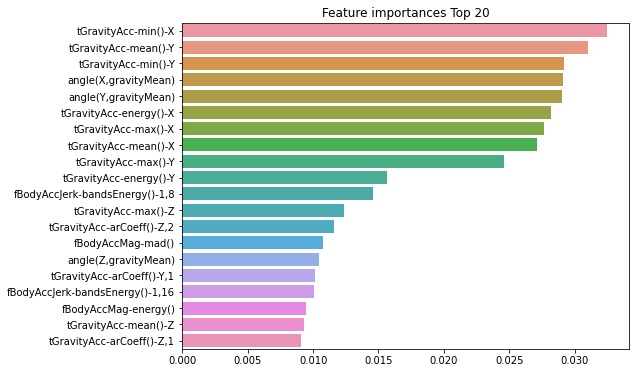

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# **5. GBM(Gradient Boosting Machine)**

## **5.1. GBM의 개요 및 실습**

부스팅 알고리즘은 여러 약한 학습기(weak learner)를 순차적으로 학습하고 예측하면서 잘못 예측한 데이터에 가중치를 부여하고 오류를 개선해 나가면서 학습하는 방식입니다. 대표적인 부스팅 방법은 **에이다부스트(Adaboost, Adaptive boosting)**와 **그레이디언트 부스트**입니다. 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅을 수행합니다. 아래는 에이다부스트가 학습하는 방법을 도식화한 그림입니다.

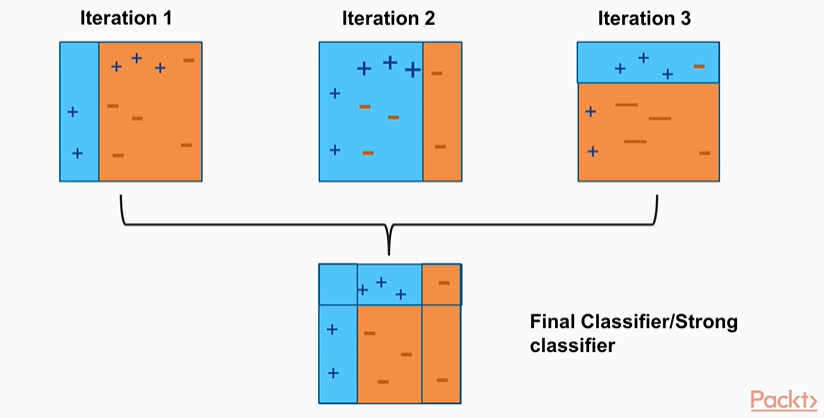

+와 -로 된 피처 데이터 세트입니다. 여러 약한 학습기가 잘못 분류된 피처에 가중치를 부여하면서(그림상 기호 크기가 커짐) 약한 학습기를 결합한 최종 결과 예측을 도출합니다. 예컨대 첫 번째 학습기에 가중치를 0.3, 두 번째 학습기에 가중치를 0.5, 세 번째 학습기에 가중치를 0.8만큼 부여하고 모두 결합하여 예측을 수행합니다.

**GBM(Gradient Boosting Machine)**은 가중치 업데이트를 **경사 하강법(Gradient Descent)**으로 적용합니다. 오류 값은 실젯값 - 예측값입니다. 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법입니다. GBM을 기반으로 수많은 알고리즘이 새로 만들어지고 있습니다.

GBM을 사용하여 사용자 행동 데이터 세트를 예측 분류해 보겠습니다. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 816.7


랜덤 포레스트의 예측 성능보다 좋습니다. 대개 GBM이 랜덤 포레스트보다 예측 성능이 좋습니다. 다만 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝에도 더 공을 들여야 합니다.

## **5.2. GBM 하이퍼 파라미터 및 튜닝**

GBM의 하이퍼 파라미터는 아래와 같습니다. `max_depth`, `max_features`에 대한 설명은 생략합니다.

- `n_estimators`: 약한 학습기 개수를 지정합니다. 디폴트는 `100`입니다. 개수가 많을수록 예측 성능이 일정 수준까지는 좋아지지만 시간이 오래 걸립니다.

- `loss`: 경사 하강법에서 사용할 비용 함수를 지정합니다.

- `learning_rate`: GBM이 학습을 수행할 때마다 적용하는 학습률입니다. 약한 학습기가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수입니다. 디폴트는 `0.1`이며 0 ~ 1 사잇값을 지정할 수 있습니다. 꽤 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아내므로 예측 성능이 높아질 가능성이 높습니다. 다만 많은 약한 학습기는 순차적인 반복이 필요하기 때문에 수행 시간이 오래 걸리고 반복이 완료되어도 최소 오류 값을 찾지 못할 수도 있습니다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려서 예측 성능이 떨어질 가능성이 높지만 빠른 수행이 가능합니다. 이런 특성 때문에 `n_estimators`와 상호 보완적으로 조합하여 사용합니다. `learning_late`를 작게 하고 `n_estimators`를 크게 하면 성능이 좋아지지 않는 한계점까지는 약간씩이나 예측 성능을 제고할 수 있습니다. 

- `subsample`: 약한 학습기가 학습에 사용하는 데이터 샘플링의 비율입니다. 디폴트는 `1`이며 전체 학습 데이터를 기반으로 학습합니다. 과적합을 낮추려면 작은 값으로 지정합니다.

그리드 서치로 하이퍼 파라미터 최적화를 수행해 보겠습니다. 오랜 시간이 소요되므로 하이퍼 파라미터를 낮은 수치만으로 제약하겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


테스트 세트에 적용하여 예측 정확도를 확인하겠습니다.

In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


GBM은 과적합도 잘 제어하는 편입니다.

# **6. XGBoost(eXtra Gradient Boost)**

## **6.1. XGBoost 개요**

**XGBoost**는 대중적으로 널리 쓰이는 알고리즘 중 하나입니다. GBM에 기반하면서도 느린 수행 시간과 과적합 규제(Regularization) 부재 등의 문제를 해결한 알고리즘입니다. 병렬 CPU 환경에서 병렬 학습이 가능하여 GBM보다 더 빠릅니다.

일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더이상 수행하지 않지만 자칫 지나치게 많은 분할이 발생할 수 있습니다. 마찬가지로 XGBoost도 `max_depth` 파라미터로 분할 깊이를 조정하기도 하지만 나무 가지치기(Tree pruning)로 긍정 이득이 없는 분할을 가지치기하여 분할 수를 더 줄입니다.

아울러 XGBoost는 반복 수행 시마다 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행하여 최적화된 반복 수행 횟수를 가질 수 있습니다. 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있도록 조기 중단(early stopping) 합니다. 결측치를 자체적으로 처리할 수도 있습니다.

## **6.2. XGBoost 설치하기**

생략합니다.

## **6.3. 파이썬 래퍼 XGBoost 하이퍼 파라미터**

본래 XGBoost는 C/C++로 개발되었고 파이썬과 사이킷런으로도 구동할 수 있도록 두 가지 래퍼 클래스(Wrapper Class)를 추가로 제공합니다. 파이썬 전용 래퍼 클래스와 사이킷런 전용 래퍼 클래스입니다. 파이썬 래퍼 클래스는 잘 쓰이지 않으므로 생략하고 넘어가겠습니다. 자세한 내용은 서적을 참고하시기 바랍니다.

## **6.4. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

생략합니다.

## **6.5. 사이킷런 래퍼 XGBoost의 개요 및 적용**

In [1]:
import xgboost
from xgboost import XGBClassifier

print(xgboost.__version__)

0.90


위스콘신 유방암 데이터 세트를 활용하여 XGBoost를 적용해보겠습니다. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


악성은 0, 양성은 1입니다.

학습 데이터 세트와 테스트 데이터 세트로 분할하겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [3]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecat

`XGBClassifier`, `XGBRegressor` 클래스의 주요 파라미터는 아래와 같습니다.

- 일반 파라미터(디폴트 값을 거의 바꾸지 않음)

 - `booster`: 트리 기반 모델(`gbtree`) 또는 선형 모델(`gblinear`)입니다. 디폴트는 `gbtree`입니다.

 - `silent`: 출력 메시지를 나타낼지 여부입니다. 디폴트는 `0`이며 출력 메시지를 나타냅니다.

 - `n_jobs` CPU의 실행 스레드 개수를 조정합니다. 디폴트는 `1`이며 전체 스레드를 사용합니다. 

- 부스터 파라미터(트리 최적화, 부스팅, 규제 등)

 - `learning_rate`: GBM과 같은 학습률입니다. 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값입니다. 0 ~ 1 사잇값이며 디폴트는 `0.1`입니다. 선호되는 값은 0.01 ~ 0.2입니다.

 - `n_estimators`: GBM과 같습니다.

 - `min_child_weight`: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합입니다. 값이 클수록 분할을 자제하며, 과적합을 조절하는 데 사용합니다. 디폴트는 `1`입니다. 

 - `gamma`: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값입니다. 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리하며, 값이 클수록 과적합이 감소합니다. 디폴트는 `0`입니다.

 - `max_depth`: 트리 기반 알고리즘과 같습니다. 디폴트는 `6`입니다. 값이 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통 3 ~ 10 사잇값을 적용합니다. 

 - `subsample`: GBM과 같습니다. 디폴트는 `1`입니다.

 - `colsample_bytree`: GBM의 `max_features`와 유사합니다. 트리 생성에 필요한 피처를 임의로 샘플링 하는 데 사용됩니다. 피처가 매우 많은 경우 과적합을 조정하는 용도입니다. 디폴트는 `1`입니다.

 - `reg_lambda`: L2 규제 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합을 감소시킬 수 있습니다. 디폴트는 `1`로 우선 적용되는 것을 의미합니다.

 - `reg_alpha`: L1 규제 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합을 감소시킬 수 있습니다. 디폴트는 `0`으로 우선 적용되지 않는 것을 의미합니다.

 - `scale_pos_weight`: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터입니다. 디폴트는 `1`입니다.

- 학습 태스크 파라미터(학습 수행 시의 객체 함수, 평가를 위한 지표 등)

 - `objective`: 최솟값을 가져야할 손실 함수입니다. 이진 분류와 다중 분류에 따라 달라집니다. `'binary:logistic'`은 이진 분류, `multi:softmax`는 다중 분류일 때 적용합니다. `multi:softmax`의 경우 레이블 클래스 개수인 `num_class` 파라미터를 지정해야 합니다. `'multi:softprob'`는 `multi:softmax`와 유사하지만 개별 레이블 클래스의 해당되는 예측 확률을 반환합니다.

 - `eval_metric`: 검증에 사용할 함수입니다. 디폴트는 회귀는 `rmse`, 분류는 `error`입니다.

   - `rmse`: Root Mean Squeare Error

   - `mae`: Mean Absolute Error
 
   - `logloss`: Negative log-likelihood

   - `error`: Binary classification error rate (0.5 threshold)

   - `merror`: Multiclass classification error rate

   - `mlogloss`: Multiclass logloss

   - `auc`: Area under the curve

뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적습니다. 아울러 튜닝을 하더라도 효과가 적은 것이 대부분입니다. 튜닝하는 경우는 피처 수가 매우 많거나 피처 간 상관되는 정도가 많거나 데이터 세트에 따라 여러 가지 특성이 있을 수 있습니다.

과적합을 제어하려면 아래 방법을 적용할 수 있습니다.

- `learning_rate` 값을 0.01 ~ 0.1로 낮추고 `num_round` 값을 높입니다.

- `max_depth` 값을 낮춥니다.

- `min_child_weight` 값을 높입니다.

- `gamma` 값을 높입니다.

- `subsample` 값과 `colsample_bytree` 값을 조정합니다.

학습과 예측을 수행하겠습니다. 아울러 이전 챕터에서 선언했던 `get_clf_eval()` 함수를 호출하여 모델의 예측 성능을 평가하겠습니다.

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806,    AUC: 0.9951


조기 중단을 수행하려면 `fit()` 메서드가 가진 파라미터에 인자를 지정해야 합니다. 아래는 조기 중단 관련 파라미터 목록입니다.

- `early_stopping_rounds`: 평가 지표가 향상될 수 있는 반복 횟수입니다.

- `eval_metric`: 조기 중단을 위한 평가 지표입니다.

- `eval_set`: 성능 평가를 수행할 데이터 세트입니다.

아래 코드에서는 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용합니다. 다만 이는 옳지 않은 방법입니다. 테스트 데이터 세트는 학습 시에는 완전히 알려지지 않은 데이터 세트를 사용해야 합니다. 평가에 테스트 데이터 세트를 사용하면 학습 시에 미리 참고가 되므로 과적합할 수 있습니다. 데이터 세트 크기가 작아서 데스트 데이터를 평가용으로 사용했을 뿐입니다. 

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [[X_test, y_test]]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

`n_estimators`를 `400`으로 지정하여 400번 반복하게 했지만 311번만 반복하고 학습을 완료했습니다. 211번 반복 시 logloss가 0.085593이고 311번 반복 시 0.085948인데, 211번에서 311번까지 `early_stopping_rounds=100`으로 지정된 100번의 반복 학습을 수행하는 동안 성능 평가 지수가 향상되지 않았기 때문에 반복을 멈춘 것입니다.

조기 중단으로 학습된 모델의 예측 성능을 확인하겠습니다.

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744,    AUC: 0.9954


성능이 약간 떨어졌습니다.

`early_stopping_rounds` 파라미터의 값을 `10`으로 내려보겠습니다.

In [ ]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss',
                eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


조기 중단으로 학습된 모델의 예측 성능을 확인하겠습니다.

In [ ]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677,    AUC: 0.9947


성능이 더 떨어졌습니다. 이처럼 조기 중단값을 급격하게 줄이면 예측 성능이 저하될 수 있습니다. 성능이 향상될 여지가 있지만 10번 반복하는 동안 성능 평가 지표가 향상되지 않아서 반복을 멈추고 학습을 충분하게 수행하지 못하여 예측 성능이 저하되는 것입니다.

`plot_importance()` 메서드를 사용하여 피처 중요도를 시각화해보겠습니다.

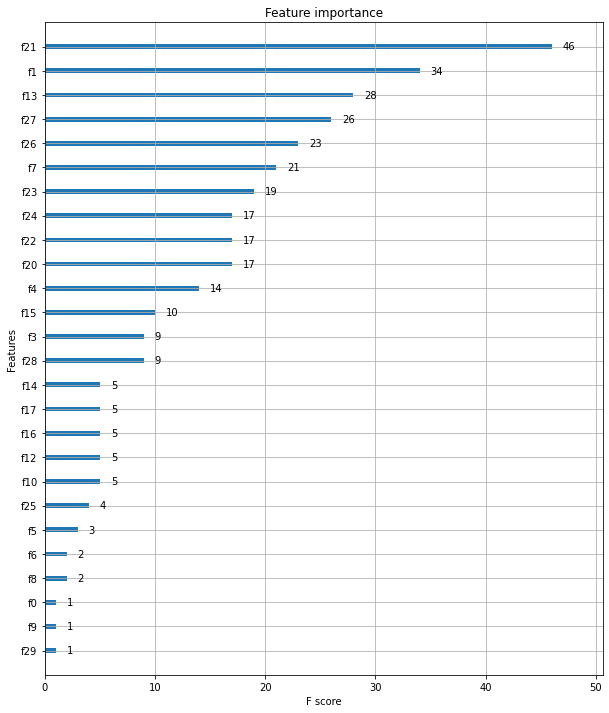

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.show()

'f0'이 첫 번째 피처, 'f1'이 두 번째 피처입니다. 기본 평가 지표는 f1 스코어를 기반으로 합니다.

# **7. LightGBM**

**LightGBM**은 각광을 받고 있는 부스팅 계열 알고리즘입니다. XGBoost보다 학습 시간과 예측 시간이 빠르고 더 작은 메모리를 사용합니다. 아울러 원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 노드를 분할합니다. 대용량 데이터에 대한 뛰어난 예측 성능을 발휘하고 병렬 컴퓨팅 기능과 GPU를 제공합니다. 다만 일반적으로 10,000건 이하의 적은 데이터 세트에 적용하면 과적합이 발생하기 쉽습니다.

LightGBM은 일반 GBM 계열의 트리 분할 방법인 **균형 트리 분할(Level Wise)**과 달리 **리프 중심 트리 분할(Leaf Wise)** 방식을 사용합니다. 균형 트리 분할은 최대한 균형 잡힌 트리를 유지하면서 분할하므로 트리 깊이를 최소화할 수 있습니다. 균형 잡힌 트리는 오버피팅에 더 강하지만 시간이 오래 걸립니다. 반면 LightGBM이 사용하는 리프 중심 트리 분할은 트리 균형을 맞추지 않고 **최대 손실 값(max delta loss)**을 가지는 리프 노드를 지속적으로 분할하면서 비대칭하고 깊이가 깊은 트리를 만듭니다. 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있습니다.

## **7.1. LightGBM 설치**

생략합니다.

## **7.2. LightGBM 하이퍼 파라미터**

In [6]:
from lightgbm import LGBMClassifier

help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)
 |  
 |  LightGBM classifier.
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric=None, early_stopping_rounds=None, verbose=True, feature_name='auto', cate

LightGBM의 하이퍼 파라미터는 XGBoost와 비슷합니다. 다만 LightGBM은 리프 노드가 계속 분할되면서 트리가 깊어지므로 하이퍼 파라미터를 조금 다르게 지정해야 합니다. 에컨대 `max_depth` 값이 매우 큽니다. 파라미터 목록은 아래와 같습니다.

- 주요 파라미터

 - `n_estimators`: 반복 수행하려는 트리 개수입니다. 크게 지정하면 예측 성능이 높을 수 있지만 지나치면 과적합이 발생합니다. 디폴트는 `100`입니다.

 - `learning rate`: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률이며 0 ~ 1 사잇값입니다. 일반적으로 `n_estimators`를 크게 하고 `learning rate`를 작게 하면 예측 성능이 향상되지만 과적합 되거나 학습 시간이 오래 걸립니다. XGBoost과 동일한 파라미터입니다. 디폴트는 `0.1`입니다.

 - `max_depth`: 트리 기반 알고리즘과 같습니다. 0보다 작은 값을 지정하면 깊이에 제한이 없습니다. 디폴트는 `-1`입니다.

 - `min_child_samples`: 최종 결정 클래스인 리프 노드가 되기 위해 최소한으로 필요한 레코드 수이며 결정 트리의 `min_samples_leaf`와 같습니다. 과적합을 제어하는 데 쓰입니다. 디폴트는 `20`입니다.

 - `num_leaves`: 트리 하나가 가질 수 있는 최대 리프 개수입니다. 디폴트는 `31`입니다.

 - `boosting`: 부스팅 트리를 생성하는 알고리즘을 기술합니다. 지정할 수 있는 값은 아래 2가지입니다.

   - `gbdt`: 일반적인 그레이디언트 부스팅 결정 트리이며 디폴트입니다.

   - `rf`: 랜덤 포레스트입니다.

 - `subsample`: 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율입니다. XGBoost와 동일합니다.

 - `colsample_bytree`: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율입니다. 과적합 방지에 사용됩니다. GBM의 `max_features`와 유사하고 XGBoost의 `colsample_bytree`와 동일합니다. 디폴트는 `

 - `reg_lambda`: L2 규제 제어를 위한 값입니다. XGBoost와 동일합니다. 디폴트는 `0.0`입니다.

 - `reg_alpha`: L1 규제 제어를 위한 값입니다. XGBoost와 동일합니다. 디폴트는 `0.0`입니다.

- 학습 태스크 파라미터

 - `objective`: 최솟값을 가져야 할 손실함수입니다. XGBoost와 같습니다.

## **7.3. 하이퍼 파라미터 튜닝 방안**



---

휴식 중

---



## **7.4. 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**

생략합니다.

## **7.5. LightGBM 적용 - 위스콘신 유방암 예측**

# **8. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

## **8.1. 데이터 전처리**

## **8.2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

## **8.3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

# **9. 분류 실습 - 캐글 신용카드 사기 검출**

## **9.1. 언더 샘플링과 오버 샘플링의 이해**

## **9.2. 데이터 일차 가공 및 모델 학습/예측/평가**

## **9.3. 데이터 분포도 변환 후 모델 학습/예측 평가**

## **9.4. 이상치 데이터 제거 후 모델 학습/예측/평가**

## **9.5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

# **10. 스태킹 앙상블**

## **10.1. 기본 스태킹 모델**

## **10.2. CV 세트 기반의 스태킹**

# **11. 정리**